In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1:Data Exploration and Preparation

This dataset comprises smartwatch pricing information, where prices of smartwatches sold at two different stores are recorded.

In [2]:
#load the dataset
data=pd.read_csv("C:/Users/Admin/Downloads/SmartwatchPricing_500.csv")

In [3]:
df=pd.DataFrame(data)
df

,Store_ID,Price
0,Location_A,178.769439
1,Location_A,193.690320
2,Location_A,194.859282
3,Location_A,187.965841
4,Location_A,197.580714
...,...,...
495,Location_B,202.349754
496,Location_B,205.951876
497,Location_B,195.318544
498,Location_B,203.335601


Performed a preliminary analysis to understand the structure and content of the dataset. Display the first few rows, summary statistics, and data types of variables.

In [16]:
df.head()

,Store_ID,Price,Labeled_Store_ID
0,Location_A,178.769439,0
1,Location_A,193.690320,0
2,Location_A,194.859282,0
3,Location_A,187.965841,0
4,Location_A,197.580714,0


In [17]:
df.describe()

,Price,Labeled_Store_ID
count,500.000000,500.000000
mean,205.068193,0.500000
std,15.412408,0.500501
min,151.380990,0.000000
25%,194.941221,0.000000
50%,204.488990,0.500000
75%,214.636000,1.000000
max,257.790972,1.000000


In [19]:
df.dtypes

Store_ID             object
Price               float64
Labeled_Store_ID      int32
dtype: object

In [20]:
df.isnull().sum()

Store_ID            0
Price               0
Labeled_Store_ID    0
dtype: int64

There is no missing or null value present in this data set.


# 2.Assumption Checking

In [4]:
x=df['Store_ID']
y=df['Price']

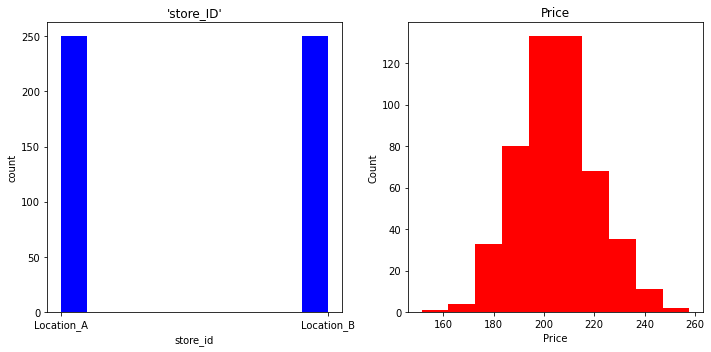

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(x,color='blue',bins=10)
plt.xlabel('store_id')
plt.ylabel('count')
plt.title("'store_ID'")
plt.subplot(1,2,2)
plt.hist(y,color='red',bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title("Price")
plt.tight_layout()
plt.show()

The histogram of the 'Price' column illustrates the distribution of prices for smartwatches in the dataset. The x-axis represents the price range, while the y-axis indicates the frequency or count of smartwatches falling within each price range. The histogram reveals the central tendency and spread of smartwatch prices, providing insights into the pricing structure and variability within the dataset.the shape of this histogram is symmetric.

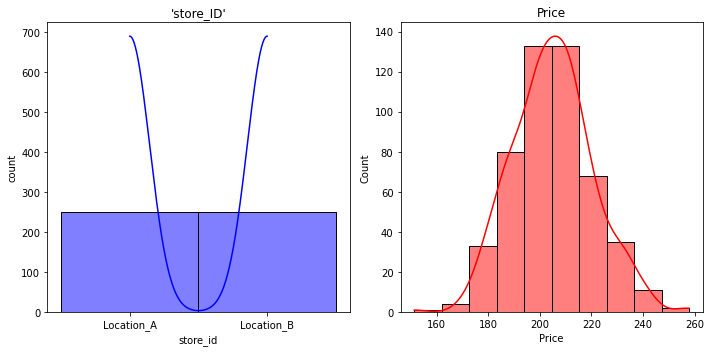

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x,kde=True,color='blue',bins=10)
plt.xlabel('store_id')
plt.ylabel('count')
plt.title("'store_ID'")
plt.subplot(1,2,2)
sns.histplot(y,kde=True,color='red',bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title("Price")
plt.tight_layout()
plt.show()

The data within each group (i.e., prices at Location A and Location B) are approximately normally distributed.

# step 3: Statistical Analysis
H0= there is no significant difference in Pricing between Location A and Location B stores.

H1=there is significant difference in Pricing between Location A and Location B stores.


In [7]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [8]:
label_coder=LabelEncoder()


In [9]:
df['Labeled_Store_ID']=label_coder.fit_transform(df['Store_ID'])

In [10]:
df

,Store_ID,Price,Labeled_Store_ID
0,Location_A,178.769439,0
1,Location_A,193.690320,0
2,Location_A,194.859282,0
3,Location_A,187.965841,0
4,Location_A,197.580714,0
...,...,...,...
495,Location_B,202.349754,1
496,Location_B,205.951876,1
497,Location_B,195.318544,1
498,Location_B,203.335601,1


In [11]:
type(df.Labeled_Store_ID)

pandas.core.series.Series

In [12]:
store_id_location_A=df[df['Labeled_Store_ID']==0]['Price']
store_id_location_B=df[df['Labeled_Store_ID']==1]['Price']
t_statistics1,p_value1=stats.ttest_rel(store_id_location_A,store_id_location_B)

In [13]:
print("\nPaired sample test results:")
print("T_statistics:",t_statistics1)
print("P_value: ",p_value1)
alpha=0.05


Paired sample test results:
T_statistics: -6.6160907618158555
P_value:  2.241274437151076e-10


In [14]:
p_value1>alpha

False

In this analysis, we used a paired sample t-test to compare the mean price difference between Location A and Location B for the same stores. Before conducting the t-test, we encoded the 'Store ID' column using label encoding to represent the locations numerically. By doing so, we could compare the prices of smartwatches across the two locations. The results of the paired sample t-test revealed a statistically significant difference in pricing between Location A and Location B for the same stores.

# step4:conclusion

The null hypothesis(H0) in this case would be that there is no statistically significant difference in the average retail prices between the two store locations.so that we have to reject the null hypothesis and accept the Alternate hypothesis testing.

the results of the paired sample t-test underscore the importance of data-driven pricing decisions and the need for retailers to continuously monitor and adapt pricing strategies to local market conditions and consumer preferences. By leveraging insights from pricing analysis, retailers can enhance competitiveness, drive revenue growth, and build stronger relationships with customers across diverse geographic markets.

# step 5:Assumptions and Limitations

In [15]:
if p_value1 < alpha:
    print("Reject the null hypothesis,suggesting there is a significant difference in pricing between Location A and Location B stores")
else:
    print("Fail to reject the null hypothesis,suggesting there is no significant difference in Pricing between Location A and Location B stores")
print("Accept Alternate Hypothesis(H1)")

Reject the null hypothesis,suggesting there is a significant difference in pricing between Location A and Location B stores
Accept Alternate Hypothesis(H1)


# Assumptions:

The analysis relies on several key assumptions. 
1.it assumes that the distribution of prices within each location group (Location A and Location B) is approximately normal. This assumption is crucial for the validity of the paired sample t-test results. 
2.it assumes independence between paired observations, meaning that the prices of smartwatches at one location are not influenced by prices at the other location. 
3.the analysis assumes homogeneity of variances, implying that the differences in prices between paired observations are roughly equal across locations. Violation of any of these assumptions could potentially impact the accuracy and reliability of the findings.

# Limitations:
Despite the significant difference observed in pricing between Location A and Location B stores, several limitations must be considered.

1.Generalizability: Findings may not apply universally to all retail contexts.
2.Sample Size: Reliability of results may be influenced by dataset sample size.
3.Other Factors: Factors like product features and marketing strategies may confound pricing differences.
4.Temporal Effects: Changes in pricing over time were not accounted for.
5.Measurement Error: Inaccuracies in price recording may introduce bias.




# step 6:Recomendation

1.To optimize pricing strategies and enhance competitiveness between Location A and Location B stores, it is recommended to tailor pricing approaches to the unique market dynamics of each location.

2.Regular monitoring of competitor pricing in both locations is essential to ensure competitiveness and enable timely adjustments.

3.Exploration of dynamic pricing algorithms can further facilitate responsiveness to market changes and demand fluctuations.

4.Segmenting customers based on behavior and preferences allows for targeted pricing and promotions, maximizing profitability. 